### Analiza

In [25]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os
import random
import matplotlib.pyplot as plt

def change_bits(pattern, num_bits):
    indices = random.sample(range(len(pattern)), num_bits)

    new_pattern = pattern.copy()
    for index in indices:
        new_pattern[index] *= -1
    return new_pattern


dir = "Data"

test_cases = []
for _, _, files in os.walk(dir):
    for file in files:
        test_cases.append(TestCase(file, dir))

random.seed(10)
for test_case in test_cases:
    print("Test case -- ", test_case.name)
    print()

    patterns_number = len(test_case.patterns)
    network_hebbian = HopfieldNetwork(test_case.shape[0] * test_case.shape[1])
    network_hebbian.train_hebbian(patterns=test_case.patterns)

    hebbian_acc = 0
    hebbian_dim1_acc = 0
    hebbian_dim2_acc = 0
    hebbian_dim3_acc = 0
    hebbian_async_acc = 0
    hebbian_async_dim1_acc = 0
    hebbian_async_dim2_acc = 0
    hebbian_async_dim3_acc = 0
    hebbian_stable = 0
    hebbian_correct = 0
    hebbian_correct1 = 0
    hebbian_correct2 = 0
    hebbian_correct3 = 0
    hebbian_async_stable = 0
    hebbian_async_correct = 0
    hebbian_async_correct1 = 0
    hebbian_async_correct2 = 0
    hebbian_async_correct3 = 0

    network_oja = HopfieldNetwork(test_case.shape[0] * test_case.shape[1])
    network_oja.train_oja(patterns=test_case.patterns)

    oja_acc = 0
    oja_dim1_acc = 0
    oja_dim2_acc = 0
    oja_dim3_acc = 0
    oja_async_acc = 0
    oja_async_dim1_acc = 0
    oja_async_dim2_acc = 0
    oja_async_dim3_acc = 0
    oja_stable = 0
    oja_correct = 0
    oja_correct1 = 0
    oja_correct2 = 0
    oja_correct3 = 0
    oja_async_stable = 0
    oja_async_correct = 0
    oja_async_correct1 = 0
    oja_async_correct2 = 0
    oja_async_correct3 = 0

    iters = 3
    for pattern in test_case.patterns:
        retrived_pattern = network_oja.recall(pattern)
        oja_acc += (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
        stable = network_oja.is_stable(pattern)
        oja_stable += stable
        oja_correct += np.array_equal(pattern, retrived_pattern)
        retrived_pattern = network_oja.recall_async(pattern)
        oja_async_acc += (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
        stable = network_oja.is_stable_async(pattern)
        oja_async_stable += stable
        oja_async_correct += np.array_equal(pattern, retrived_pattern)

        retrived_pattern = network_hebbian.recall(pattern)
        hebbian_acc += (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
        stable = network_hebbian.is_stable(pattern)
        hebbian_stable += stable
        hebbian_correct += np.array_equal(pattern, retrived_pattern)
        retrived_pattern = network_hebbian.recall_async(pattern)
        hebbian_async_acc += (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
        stable = network_hebbian.is_stable_async(pattern)
        hebbian_async_stable += stable
        hebbian_async_correct += np.array_equal(pattern, retrived_pattern)

        for _ in range(iters):
            pattern1 = change_bits(pattern,int(np.ceil(network_hebbian.num_neurons/100)))
            pattern2 = change_bits(pattern,int(np.ceil(3*network_hebbian.num_neurons/100)))
            pattern3 = change_bits(pattern,int(np.ceil(10*network_hebbian.num_neurons/100)))

            retrived_pattern = network_hebbian.recall(pattern1)
            hebbian_dim1_acc += (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            hebbian_correct1 += np.array_equal(pattern, retrived_pattern)
            retrived_pattern = network_hebbian.recall_async(pattern1)
            hebbian_async_dim1_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            hebbian_async_correct1 += np.array_equal(pattern, retrived_pattern)

            retrived_pattern = network_hebbian.recall(pattern2)
            hebbian_dim2_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            hebbian_correct2 += np.array_equal(pattern, retrived_pattern)
            retrived_pattern = network_hebbian.recall_async(pattern2)
            hebbian_async_dim2_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            hebbian_async_correct2 += np.array_equal(pattern, retrived_pattern)

            retrived_pattern = network_hebbian.recall(pattern3)
            hebbian_dim3_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            hebbian_correct3 += np.array_equal(pattern, retrived_pattern)
            retrived_pattern = network_hebbian.recall_async(pattern3)
            hebbian_async_dim3_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            hebbian_async_correct3 += np.array_equal(pattern, retrived_pattern)

            retrived_pattern = network_oja.recall(pattern1)
            oja_dim1_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            oja_correct1 += np.array_equal(pattern, retrived_pattern)
            retrived_pattern = network_oja.recall_async(pattern1)
            oja_async_dim1_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            oja_async_correct1 += np.array_equal(pattern, retrived_pattern)

            retrived_pattern = network_oja.recall(pattern2)
            oja_dim2_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            oja_correct2 += np.array_equal(pattern, retrived_pattern)
            retrived_pattern = network_oja.recall_async(pattern2)
            oja_async_dim2_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            oja_async_correct2 += np.array_equal(pattern, retrived_pattern)

            retrived_pattern = network_oja.recall(pattern3)
            oja_dim3_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            oja_correct3 += np.array_equal(pattern, retrived_pattern)
            retrived_pattern = network_oja.recall_async(pattern3)
            oja_async_dim3_acc+= (retrived_pattern == pattern).sum()/float(retrived_pattern.size)
            oja_async_correct3 += np.array_equal(pattern, retrived_pattern)

    hebbian_async_correct1 /=iters
    hebbian_async_correct2 /= iters
    hebbian_correct3/=iters
    hebbian_correct1 /=iters
    hebbian_correct2 /= iters
    hebbian_async_correct3 /= iters
    hebbian_dim1_acc /= iters
    hebbian_dim2_acc /= iters
    hebbian_dim3_acc /= iters
    hebbian_async_dim1_acc /= iters
    hebbian_async_dim2_acc /= iters
    hebbian_async_dim3_acc /= iters
    oja_async_correct1 /= iters
    oja_async_correct2 /= iters
    oja_async_correct3 /= iters
    oja_correct1 /= iters
    oja_correct2 /= iters
    oja_correct3 /= iters
    oja_dim1_acc /= iters
    oja_dim2_acc /= iters
    oja_dim3_acc /= iters
    oja_async_dim1_acc /= iters
    oja_async_dim2_acc /= iters
    oja_async_dim3_acc /= iters

    print(f"Hebbian synchronous stable patterns: {hebbian_stable} ({round(100*hebbian_stable/patterns_number,2)}%)")
    print(f"Hebbian synchronous correct patterns: {hebbian_correct} ({round(100*hebbian_correct/patterns_number,2)}%)")
    print(f"Hebbian synchronous correct patterns when 1% malformed: {hebbian_correct1} ({round(100*hebbian_correct1/patterns_number,2)}%)")
    print(f"Hebbian synchronous correct patterns when 3% bits malformed: {hebbian_correct2} ({round(100*hebbian_correct2/patterns_number,2)}%)")
    print(f"Hebbian synchronous correct patterns when 10% bits malformed: {hebbian_correct3} ({round(100*hebbian_correct3/patterns_number,2)}%)")

    print()
    print(f"Hebbian asynchronous stable patterns: {hebbian_async_stable} ({round(100*hebbian_async_stable/patterns_number,2)}%)")
    print(f"Hebbian asynchronous correct patterns: {hebbian_async_correct} ({round(100*hebbian_async_correct/patterns_number,2)}%)")
    print(f"Hebbian asynchronous correct patterns when 1% bit malformed: {hebbian_async_correct1} ({round(100*hebbian_async_correct1/patterns_number,2)}%)")
    print(f"Hebbian asynchronous correct patterns when 3% bits malformed:  {hebbian_async_correct2} ({round(100*hebbian_async_correct2/patterns_number,2)}%)")
    print(f"Hebbian asynchronous correct patterns when 10% bits malformed:  {hebbian_async_correct3} ({round(100*hebbian_async_correct3/patterns_number,2)}%)")

    print()
    print(f"Oja synchronous stable patterns: {oja_stable} ({round(100*oja_stable/patterns_number,2)}%)")
    print(f"Oja synchronous correct patterns: {oja_correct} ({round(100*oja_correct/patterns_number,2)}%)")
    print(f"Oja synchronous correct patterns when 1% bit malformed: {oja_correct1} ({round(100*oja_correct1/patterns_number,2)}%)")
    print(f"Oja synchronous correct patterns when 3% bits malformed:  {oja_correct2} ({round(100*oja_correct2/patterns_number,2)}%)")
    print(f"Oja synchronous correct patterns when 10% bits malformed:  {oja_correct3} ({round(100*oja_correct3/patterns_number,2)}%)")

    print()
    print(f"Oja asynchronous stable patterns: {oja_async_stable} ({round(100*oja_async_stable/patterns_number,2)}%)")
    print(f"Oja asynchronous correct patterns: {oja_async_correct} ({round(100*oja_async_correct/patterns_number,2)}%)")
    print(f"Oja asynchronous correct patterns when 1% bit malformed: {oja_async_correct1} ({round(100*oja_async_correct1/patterns_number,2)}%)")
    print(f"Oja asynchronous correct patterns when 3% bits malformed:  {oja_async_correct2} ({round(100*oja_async_correct2/patterns_number,2)}%)")
    print(f"Oja asynchronous correct patterns when 10% bits malformed:  {oja_async_correct3} ({round(100*oja_async_correct3/patterns_number,2)}%)")

    print()
    print(f"Hebbian synchronous accuracy in patterns: {hebbian_acc} ({round(100*hebbian_acc/patterns_number,2)}%)")
    print(f"Hebbian synchronous accuracy in patterns when 1% malformed: {hebbian_dim1_acc} ({round(100*hebbian_dim1_acc/patterns_number,2)}%)")
    print(f"Hebbian synchronous accuracy in patterns when 3% bits malformed: {hebbian_dim2_acc} ({round(100*hebbian_dim2_acc/patterns_number,2)}%)")
    print(f"Hebbian synchronous accuracy in patterns when 10% bits malformed: {hebbian_dim3_acc} ({round(100*hebbian_dim3_acc/patterns_number,2)}%)")

    print()
    print(f"Hebbian asynchronous accuracy in patterns: {hebbian_async_acc} ({round(100*hebbian_acc/patterns_number,2)}%)")
    print(f"Hebbian asynchronous accuracy in patterns when 1% malformed: {hebbian_async_dim1_acc} ({round(100*hebbian_async_dim1_acc/patterns_number,2)}%)")
    print(f"Hebbian asynchronous accuracy in patterns when 3% bits malformed: {hebbian_async_dim2_acc} ({round(100*hebbian_async_dim2_acc/patterns_number,2)}%)")
    print(f"Hebbian asynchronous accuracy in patterns when 10% bits malformed: {hebbian_async_dim3_acc} ({round(100*hebbian_async_dim3_acc/patterns_number,2)}%)")
    
    print()
    print(f"Oja synchronous accuracy in patterns: {oja_acc} ({round(100*oja_acc/patterns_number,2)}%)")
    print(f"Oja synchronous accuracy in patterns when 1% malformed: {oja_dim1_acc} ({round(100*oja_dim1_acc/patterns_number,2)}%)")
    print(f"Oja synchronous accuracy in patterns when 3% bits malformed: {oja_dim2_acc} ({round(100*oja_dim2_acc/patterns_number,2)}%)")
    print(f"Oja synchronous accuracy in patterns when 10% bits malformed: {oja_dim3_acc} ({round(100*oja_dim3_acc/patterns_number,2)}%)")

    print()
    print(f"Oja asynchronous accuracy in patterns: {oja_async_acc} ({round(100*oja_acc/patterns_number,2)}%)")
    print(f"Oja asynchronous accuracy in patterns when 1% malformed: {oja_async_dim1_acc} ({round(100*oja_async_dim1_acc/patterns_number,2)}%)")
    print(f"Oja asynchronous accuracy in patterns when 3% bits malformed: {oja_async_dim2_acc} ({round(100*oja_async_dim2_acc/patterns_number,2)}%)")
    print(f"Oja asynchronous accuracy in patterns when 10% bits malformed: {oja_async_dim3_acc} ({round(100*oja_async_dim3_acc/patterns_number,2)}%)")
    
    print()
    print()


Test case --  animals-14x9.csv

Hebbian synchronous stable patterns: 2 (33.33%)
Hebbian synchronous correct patterns: 2 (33.33%)
Hebbian synchronous correct patterns when 1% malformed: 2.0 (33.33%)
Hebbian synchronous correct patterns when 3% bits malformed: 2.0 (33.33%)
Hebbian synchronous correct patterns when 10% bits malformed: 1.6666666666666667 (27.78%)

Hebbian asynchronous stable patterns: 2 (33.33%)
Hebbian asynchronous correct patterns: 2 (33.33%)
Hebbian asynchronous correct patterns when 1% bit malformed: 2.0 (33.33%)
Hebbian asynchronous correct patterns when 3% bits malformed:  2.0 (33.33%)
Hebbian asynchronous correct patterns when 10% bits malformed:  1.6666666666666667 (27.78%)

Oja synchronous stable patterns: 1 (16.67%)
Oja synchronous correct patterns: 1 (16.67%)
Oja synchronous correct patterns when 1% bit malformed: 1.0 (16.67%)
Oja synchronous correct patterns when 3% bits malformed:  1.0 (16.67%)
Oja synchronous correct patterns when 10% bits malformed:  0.66666

### Odległość Hamminga

In [1]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os
import random
import matplotlib.pyplot as plt

def change_bits(pattern, num_bits):
    indices = random.sample(range(len(pattern)), num_bits)

    new_pattern = pattern.copy()
    for index in indices:
        new_pattern[index] *= -1
    return new_pattern


dir = "Data"

test_cases = []
for _, _, files in os.walk(dir):
    for file in files:
        test_cases.append(TestCase(file, dir))

random.seed(10)
for test_case in test_cases:
    patterns = test_case.patterns

    hamming_distance = 0
    avg_hamming = 0
    k = 0
    for i in range(len(patterns)):
        for j in range(len(patterns)):
            if i > j:
                hamming_distance = np.sum(np.abs(patterns[i]-patterns[j]))
                k+=1
            hamming_distance /=2
            avg_hamming += hamming_distance
    avg_hamming/=k
    print (f"Average hamming distance for {test_case.name} is {avg_hamming}")

Average hamming distance for animals-14x9.csv is 62.6875
Average hamming distance for large-25x25.csv is 343.4
Average hamming distance for large-25x25.plus.csv is 294.5405133928571
Average hamming distance for large-25x50.csv is 343.4
Average hamming distance for letters-14x20.csv is 40.584024468476954
Average hamming distance for letters-abc-8x12.csv is 12.833333333333334
Average hamming distance for OCRA-12x30-cut.csv is 163.24181547619048
Average hamming distance for small-7x7.csv is 35.08125


### Uszkodzenia

62.5
125.0
187.5






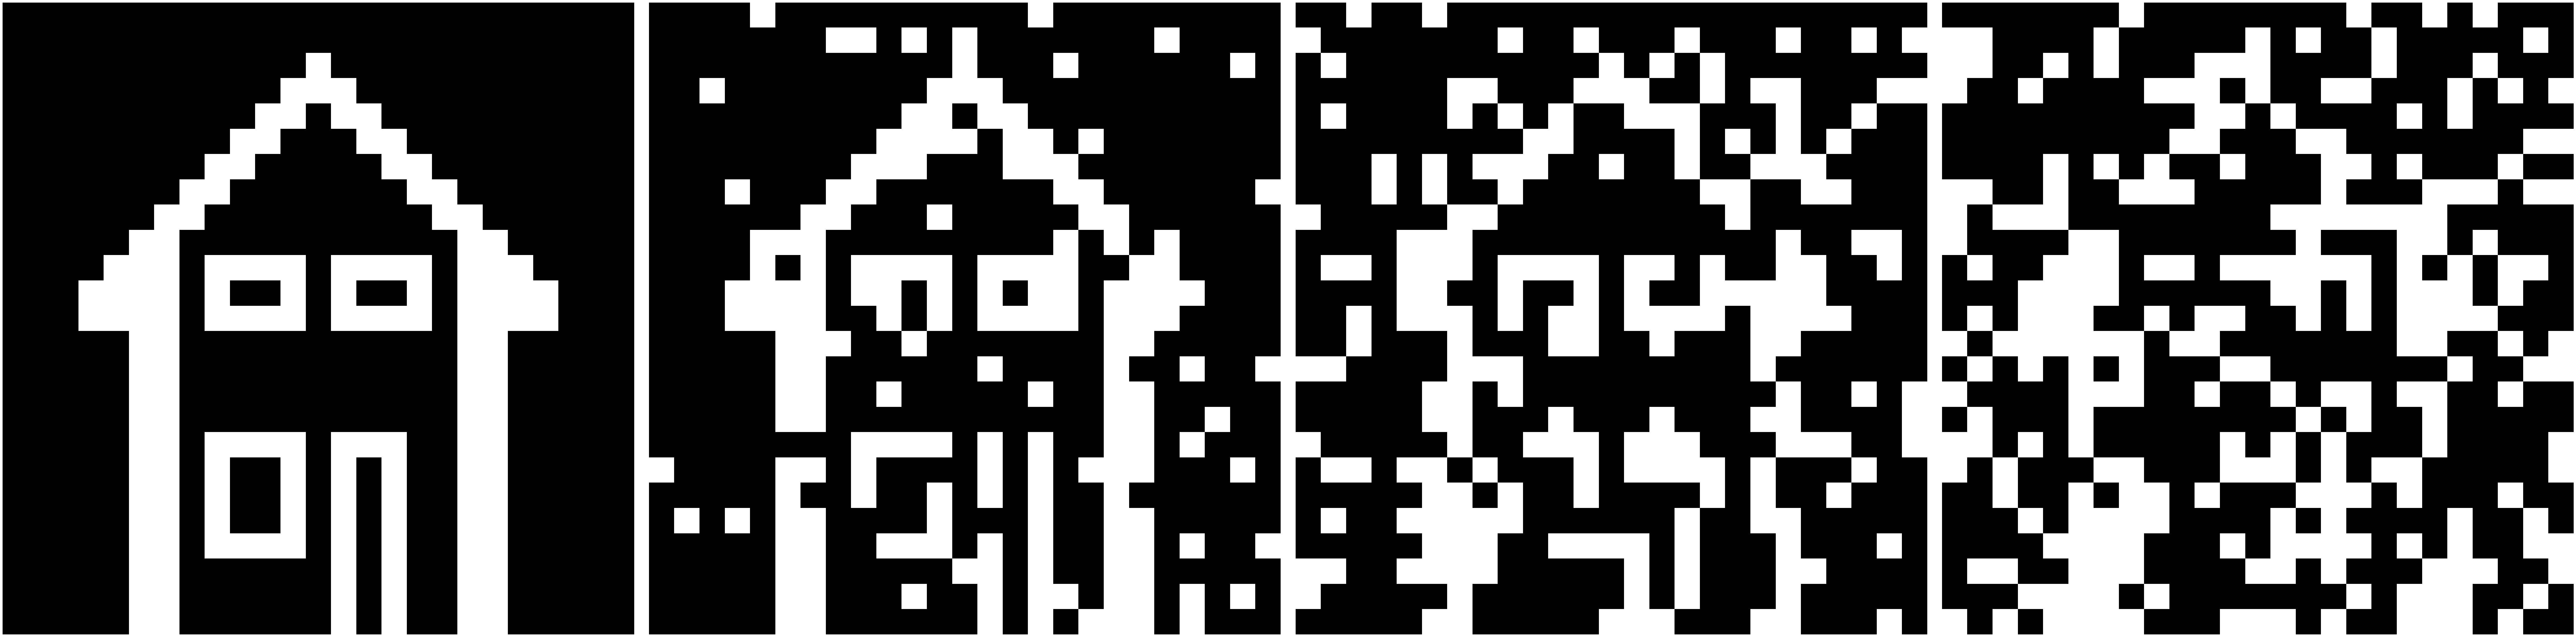

In [2]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os
import random
import matplotlib.pyplot as plt

def hide_part(pattern, frac):
    p = pattern.copy()
    for bit in range(int(np.ceil(frac*test_case.shape[0])*test_case.shape[1]), len(pattern)):
            p[bit] = -1
    return p

def change_bits(pattern, frac):
    num_bits = int(len(pattern) * frac)
    indices = random.sample(range(len(pattern)), num_bits)
    print(len(pattern) * frac)

    new_pattern = pattern.copy()
    for index in indices:
        new_pattern[index] *= -1
    return new_pattern

dir = "Data"

test_cases = []
for _, _, files in os.walk(dir):
    for file in files:
        test_cases.append(TestCase(file, dir))

frac = 0.5

fracs = [0.1, 0.3, 0.5]
random.seed(10)
for test_case in test_cases[1:2]:
    patterns = test_case.patterns
    for pattern in patterns[1:2]:
        pattern1 = change_bits(pattern, 0.1)
        pattern2 = change_bits(pattern, 0.2)
        pattern3 = change_bits(pattern, 0.3)

        fig, axs = plt.subplots(1, 4, figsize=(4*test_case.shape[1],test_case.shape[0]))
        fig.tight_layout()
        for index, p in enumerate([pattern, pattern1, pattern2, pattern3]):
            pattern_array = np.array(p)
            pattern_array = pattern_array[:test_case.shape[0] * test_case.shape[1]].reshape(test_case.shape)
            bitmap = np.where(pattern_array == 1, 255, 0)
            axs[index].axis("off")
            axs[index].imshow(bitmap, cmap='gray', interpolation='nearest')
            print()
    

In [1]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os
import random
import matplotlib.pyplot as plt

def hide_part(pattern, frac):
    p = pattern.copy()
    for bit in range(int(np.ceil(frac*test_case.shape[0])*test_case.shape[1]), len(pattern)):
            p[bit] = -1
    return p

def change_bits(pattern, frac):
    num_bits = int(len(pattern) * frac)
    indices = random.sample(range(len(pattern)), num_bits)

    new_pattern = pattern.copy()
    for index in indices:
        new_pattern[index] *= -1
    return new_pattern

dir = "Data"

test_cases = []
for _, _, files in os.walk(dir):
    for file in files:
        test_cases.append(TestCase(file, dir))

iters = 10
random.seed(10)
for test_case in test_cases[1:2]:
    network = HopfieldNetwork(test_case.shape[0] * test_case.shape[1])
    network.train_hebbian(patterns=test_case.patterns)
    patterns = test_case.patterns
    patterns_number = len(patterns)

    pattern_correct = 0
    pattern_correct1 = 0
    pattern_correct2 = 0
    pattern_correct3 = 0
    for pattern in patterns:
        for _ in range(iters):
            pattern1 = change_bits(pattern, 0.1)
            pattern2 = change_bits(pattern, 0.2)
            pattern3 = change_bits(pattern, 0.3)

            retrived_pattern = network.recall(pattern)
            pattern_correct += np.array_equal(pattern, retrived_pattern)
            retrived_pattern = network.recall(pattern1)
            pattern_correct1 += np.array_equal(pattern, retrived_pattern)
            retrived_pattern = network.recall(pattern2)
            pattern_correct2 += np.array_equal(pattern, retrived_pattern)
            retrived_pattern = network.recall(pattern3)
            pattern_correct3 += np.array_equal(pattern, retrived_pattern)

    pattern_correct/=iters
    pattern_correct1/=iters
    pattern_correct2/=iters
    pattern_correct3/=iters

    print(f"Original pattern correct patterns: {pattern_correct} ({round(100*pattern_correct/patterns_number,2)}%)")
    print(f"10% missing: {pattern_correct1} ({round(100*pattern_correct1/patterns_number,2)}%)")
    print(f"20% missing: {pattern_correct2} ({round(100*pattern_correct2/patterns_number,2)}%)")
    print(f"30% missing: {pattern_correct3} ({round(100*pattern_correct3/patterns_number,2)}%)")

Original pattern correct patterns: 5.0 (83.33%)
10% missing: 3.8 (63.33%)
20% missing: 3.7 (61.67%)
30% missing: 3.3 (55.0%)


### Oscylacja

[[0. 1.]
 [1. 0.]]


array([ 1., -1.])

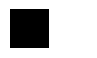

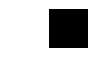

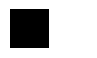

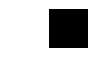

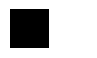

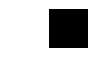

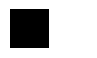

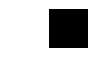

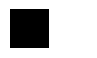

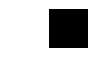

In [2]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os
import random
import matplotlib.pyplot as plt


patterns = np.array([[1,1]])
network = HopfieldNetwork(2)
network.train_hebbian(patterns=patterns)
print(network.weights)

test_pattern = np.array([1,-1])

network.recall(test_pattern, plotShape=(1,2), max_iters=10)

### Stabilne wzorce

True
True
True
True
True
True
True
True
True
True
True


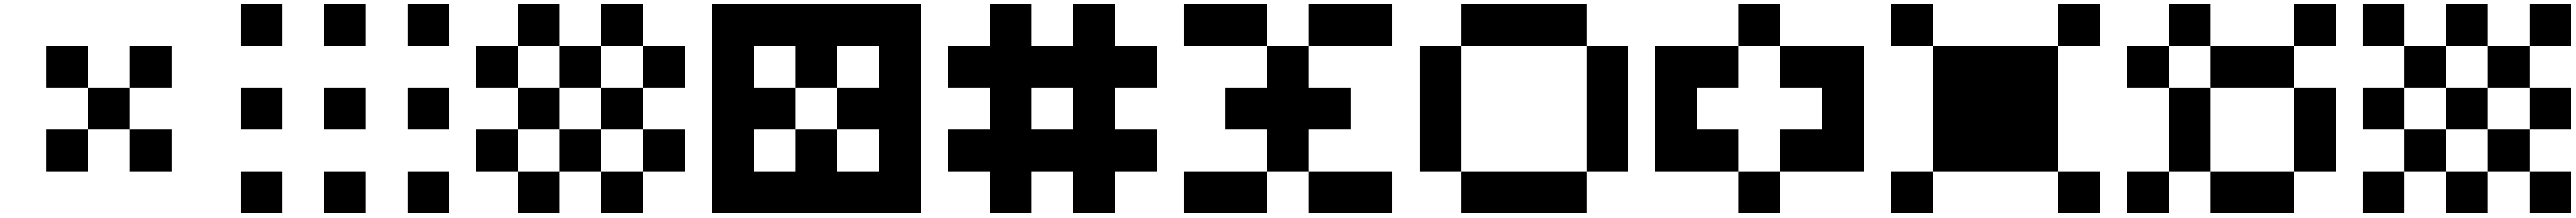

In [5]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os
import random
import matplotlib.pyplot as plt

n = 25

patterns = np.array([
    [1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1],
    [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1],
    [1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1],
    -1*np.array([1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1]),
    -1*np.array([-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1]),
    [-1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1],
    [1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1],
    -1*np.array([-1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1]),
    -1*np.array([1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1]),
    [1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1],
    [-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1],
    ])

patterns_number = len(patterns)
fig, axs = plt.subplots(1, patterns_number, figsize=(patterns_number*5,5))
fig.tight_layout()

for index, pattern in enumerate(patterns):
    pattern_array = np.array(pattern)
    pattern_array = pattern_array[:25].reshape((5,5))
    bitmap = np.where(pattern_array == 1, 255, 0)
    axs[index].axis("off")
    axs[index].imshow(bitmap, cmap='gray', interpolation='nearest')

plt.savefig("C:\\Users\\agowo\\Desktop\\data\\stable.png", dpi=5)

network = HopfieldNetwork(n)
network.train_hebbian(patterns)

for pattern in patterns:
    print(network.is_stable(pattern))

### Wizualizacja zbiegania

animals-14x9.csv

large-25x25.csv

large-25x25.plus.csv

large-25x50.csv

letters-14x20.csv


c:\Users\agowo\Desktop\Hopfield\hopfield.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(shape[1]/5,shape[0]/5))



letters-abc-8x12.csv

OCRA-12x30-cut.csv

small-7x7.csv



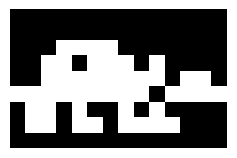

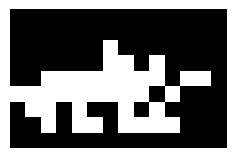

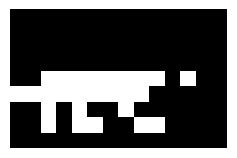

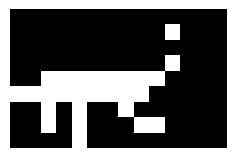

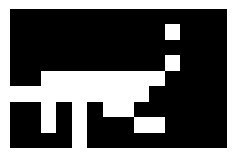

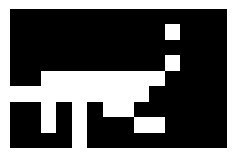

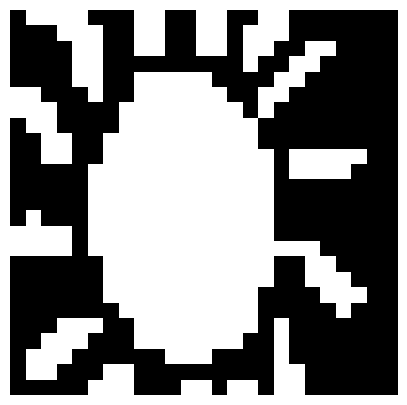

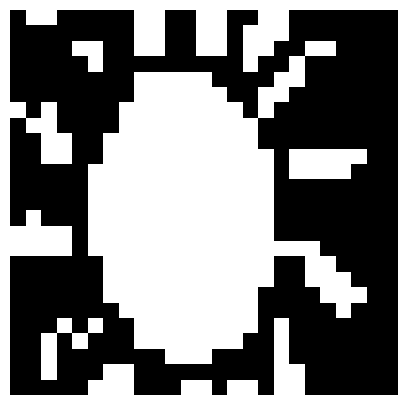

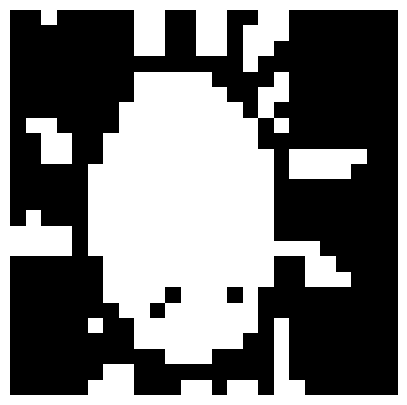

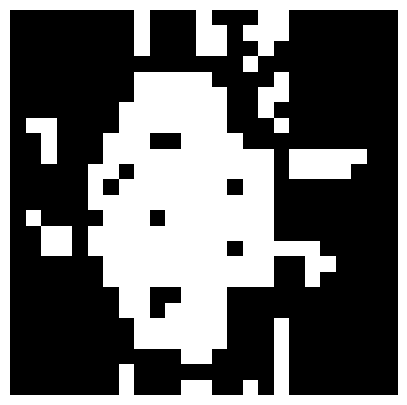

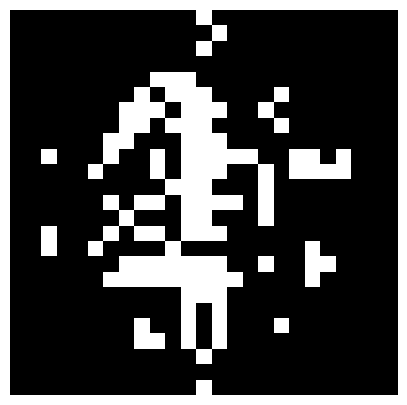

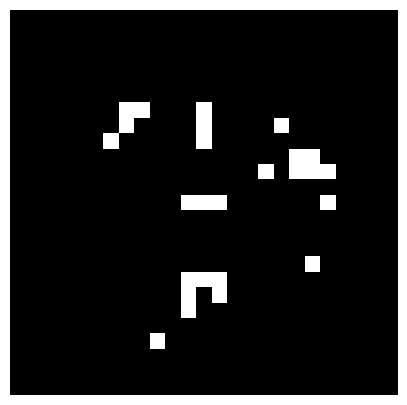

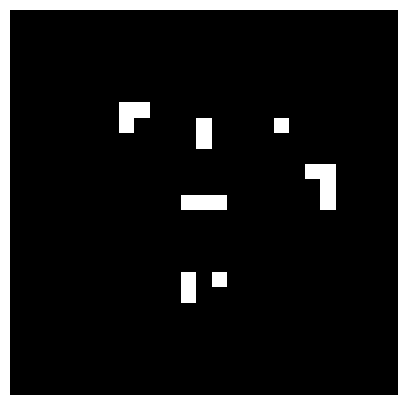

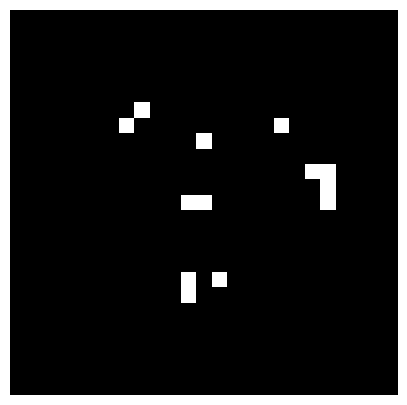

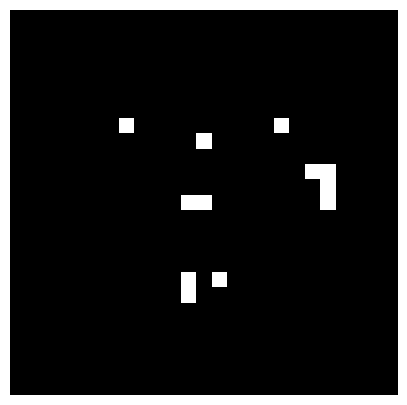

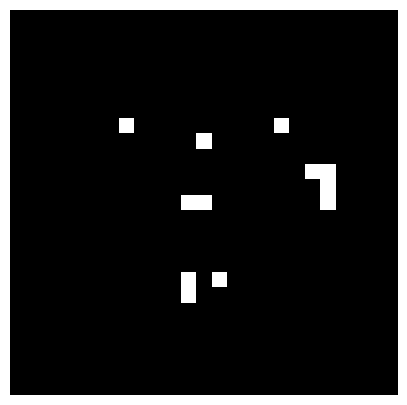

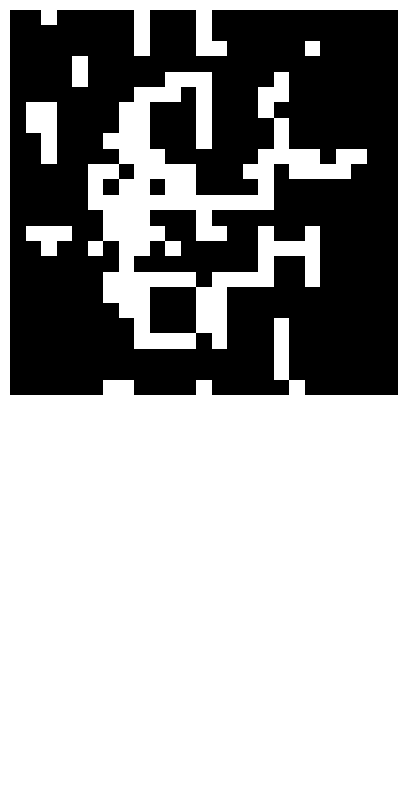

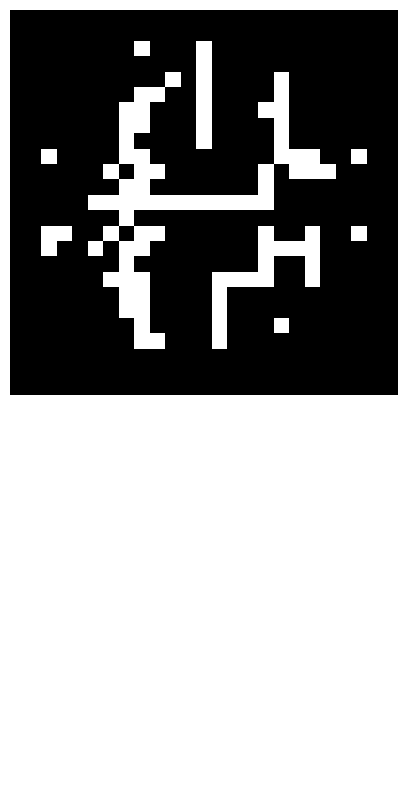

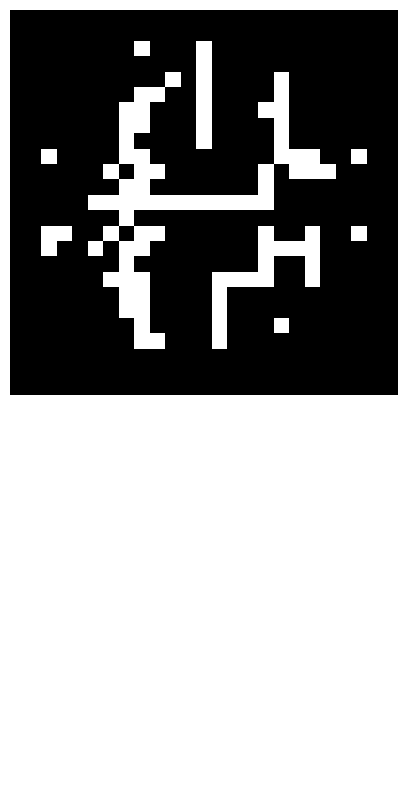

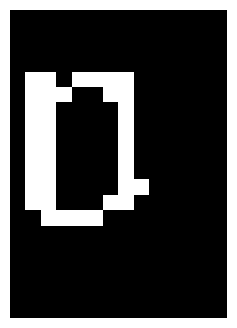

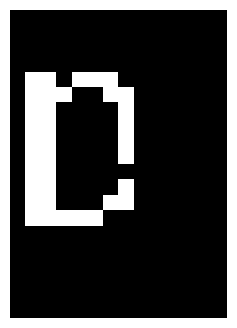

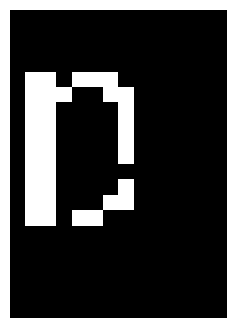

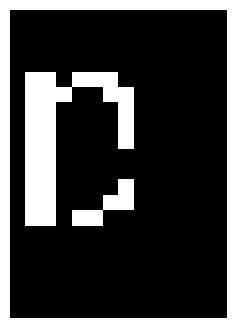

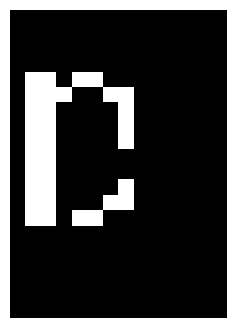

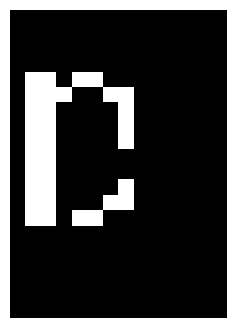

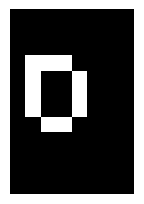

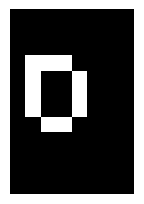

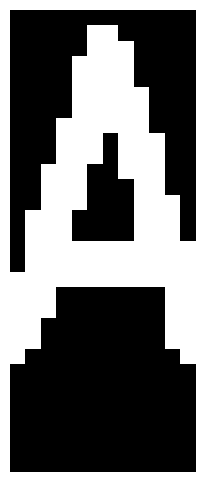

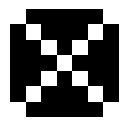

In [1]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os
import matplotlib.pyplot as plt
import numpy as np

dir = "Data"

test_cases = []
for _, _, files in os.walk(dir):
    for file in files:
        test_cases.append(TestCase(file, dir))

for test_case in test_cases:
    network = HopfieldNetwork(test_case.shape[0] * test_case.shape[1])
    network.train_hebbian(patterns=test_case.patterns)

    print(test_case.name)
    for pattern in test_case.patterns[0:1]:
        network.recall(pattern, plotShape=test_case.shape, max_iters=10)
    print()

### Wizualizacja

small-7x7.csv

1.0
1.0
1.0
0.9387755102040817
0.7551020408163265



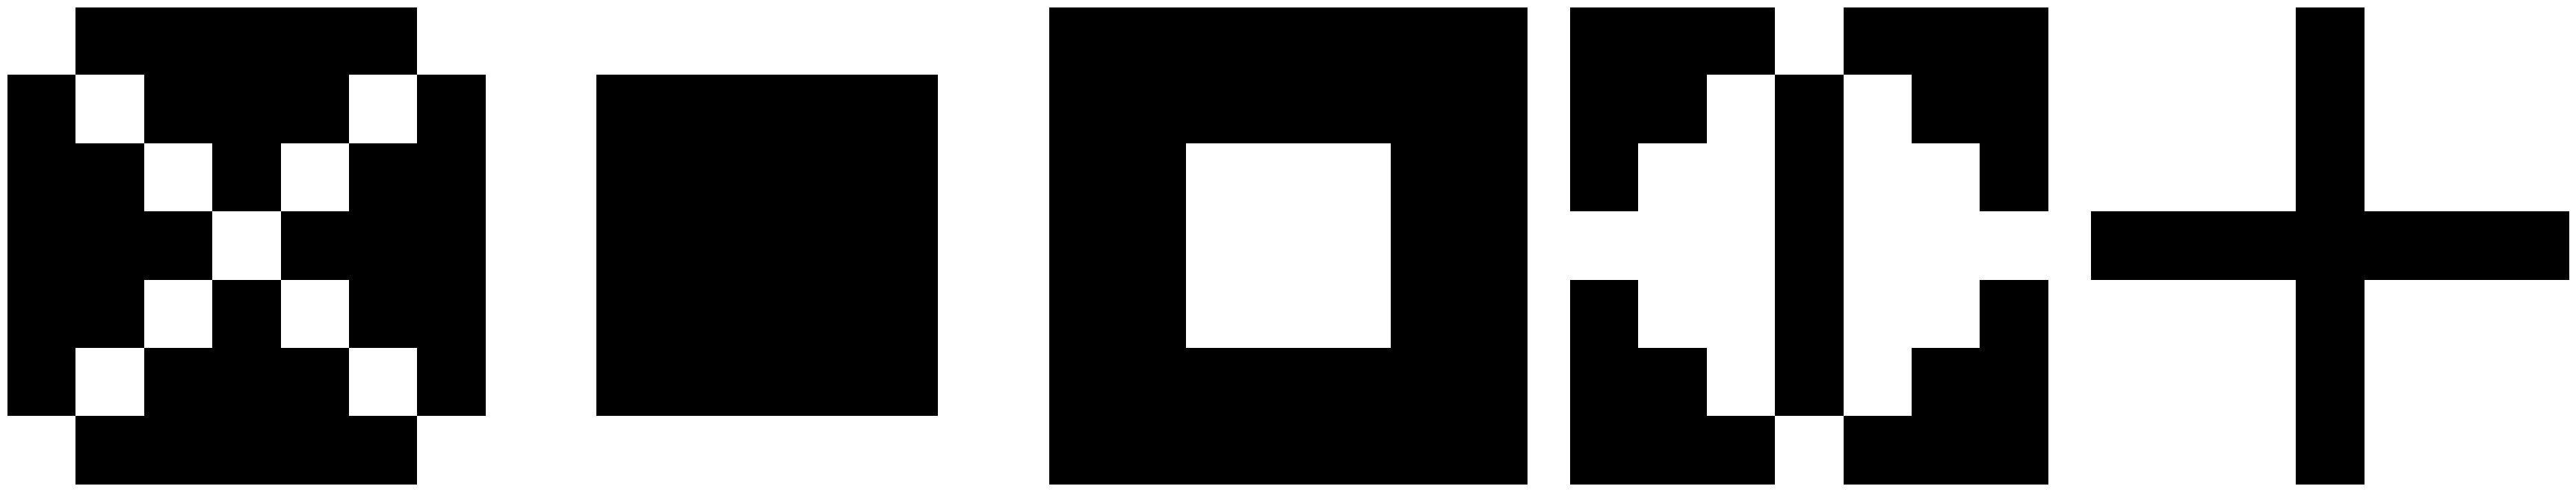

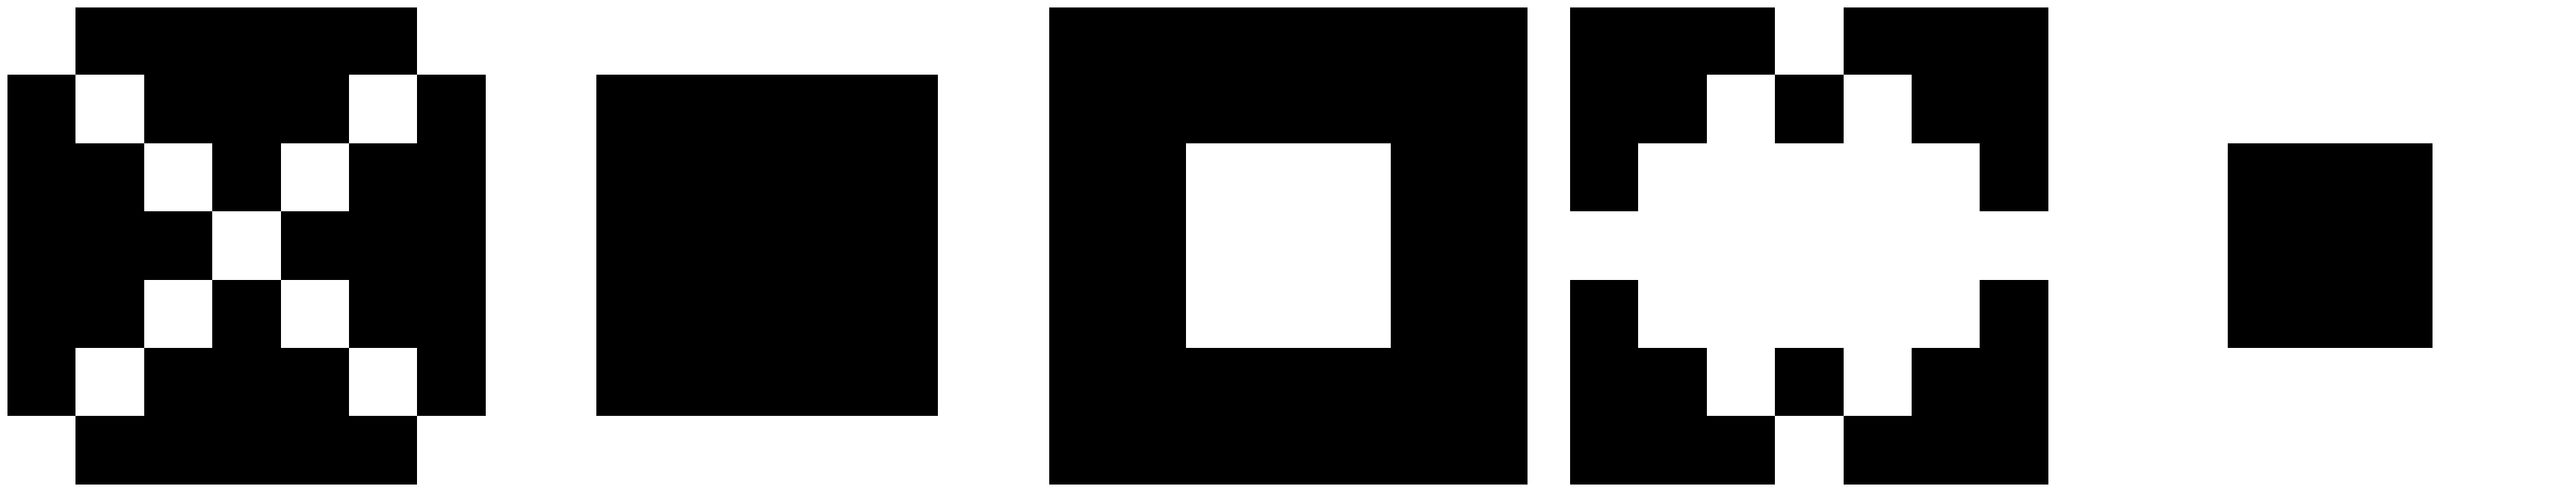

In [2]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os
import matplotlib.pyplot as plt

test_case = TestCase('small-7x7.csv','Data')

patterns_number = len(test_case.patterns)
fig, axs = plt.subplots(1, patterns_number, figsize=(patterns_number*test_case.shape[1],test_case.shape[0]))
fig.tight_layout()

print(test_case.name)
for index, pattern in enumerate(test_case.patterns):
    pattern_array = np.array(pattern)
    pattern_array = pattern_array[:test_case.shape[0] * test_case.shape[1]].reshape(test_case.shape)
    bitmap = np.where(pattern_array == 1, 255, 0)
    axs[index].axis("off")
    axs[index].imshow(bitmap, cmap='gray', interpolation='nearest')
print()

network = HopfieldNetwork(test_case.shape[0] * test_case.shape[1])
network.train_hebbian(patterns=test_case.patterns)
fig2, axs2 = plt.subplots(1, patterns_number, figsize=(patterns_number*test_case.shape[1],test_case.shape[0]))
fig2.tight_layout()
for index, pattern in enumerate(test_case.patterns):
    retrived_pattern = network.recall(pattern=pattern)
    print((retrived_pattern == pattern).sum()/float(retrived_pattern.size))
    pattern_array = np.array(retrived_pattern)
    pattern_array = pattern_array[:test_case.shape[0] * test_case.shape[1]].reshape(test_case.shape)
    bitmap = np.where(pattern_array == 1, 255, 0)
    axs2[index].axis("off")
    axs2[index].imshow(bitmap, cmap='gray', interpolation='nearest')
print()
    


animals-14x9.csv

large-25x25.csv

large-25x25.plus.csv

large-25x50.csv

letters-14x20.csv

letters-abc-8x12.csv

OCRA-12x30-cut.csv

small-7x7.csv



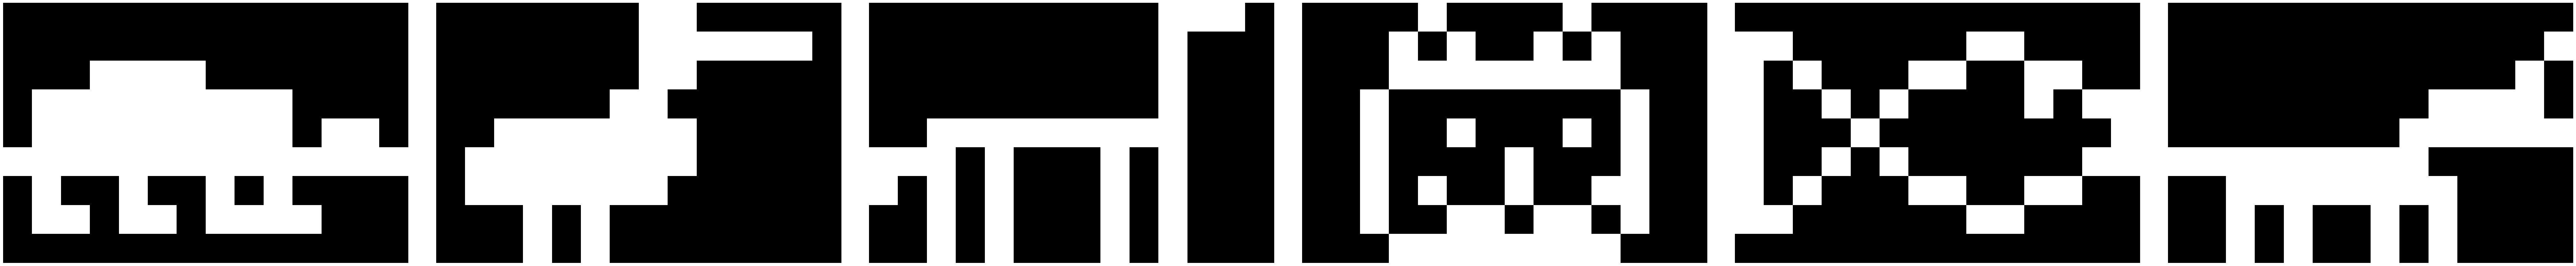

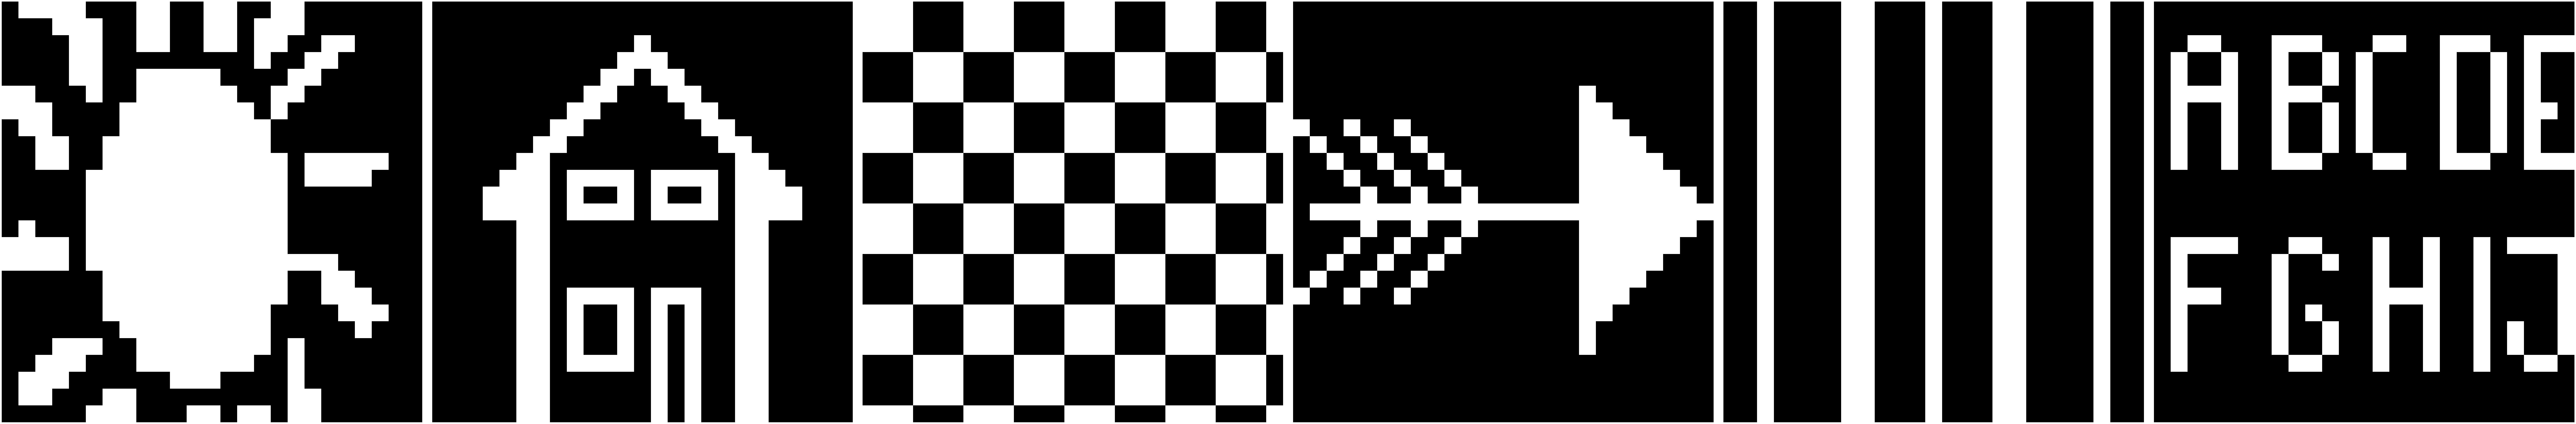

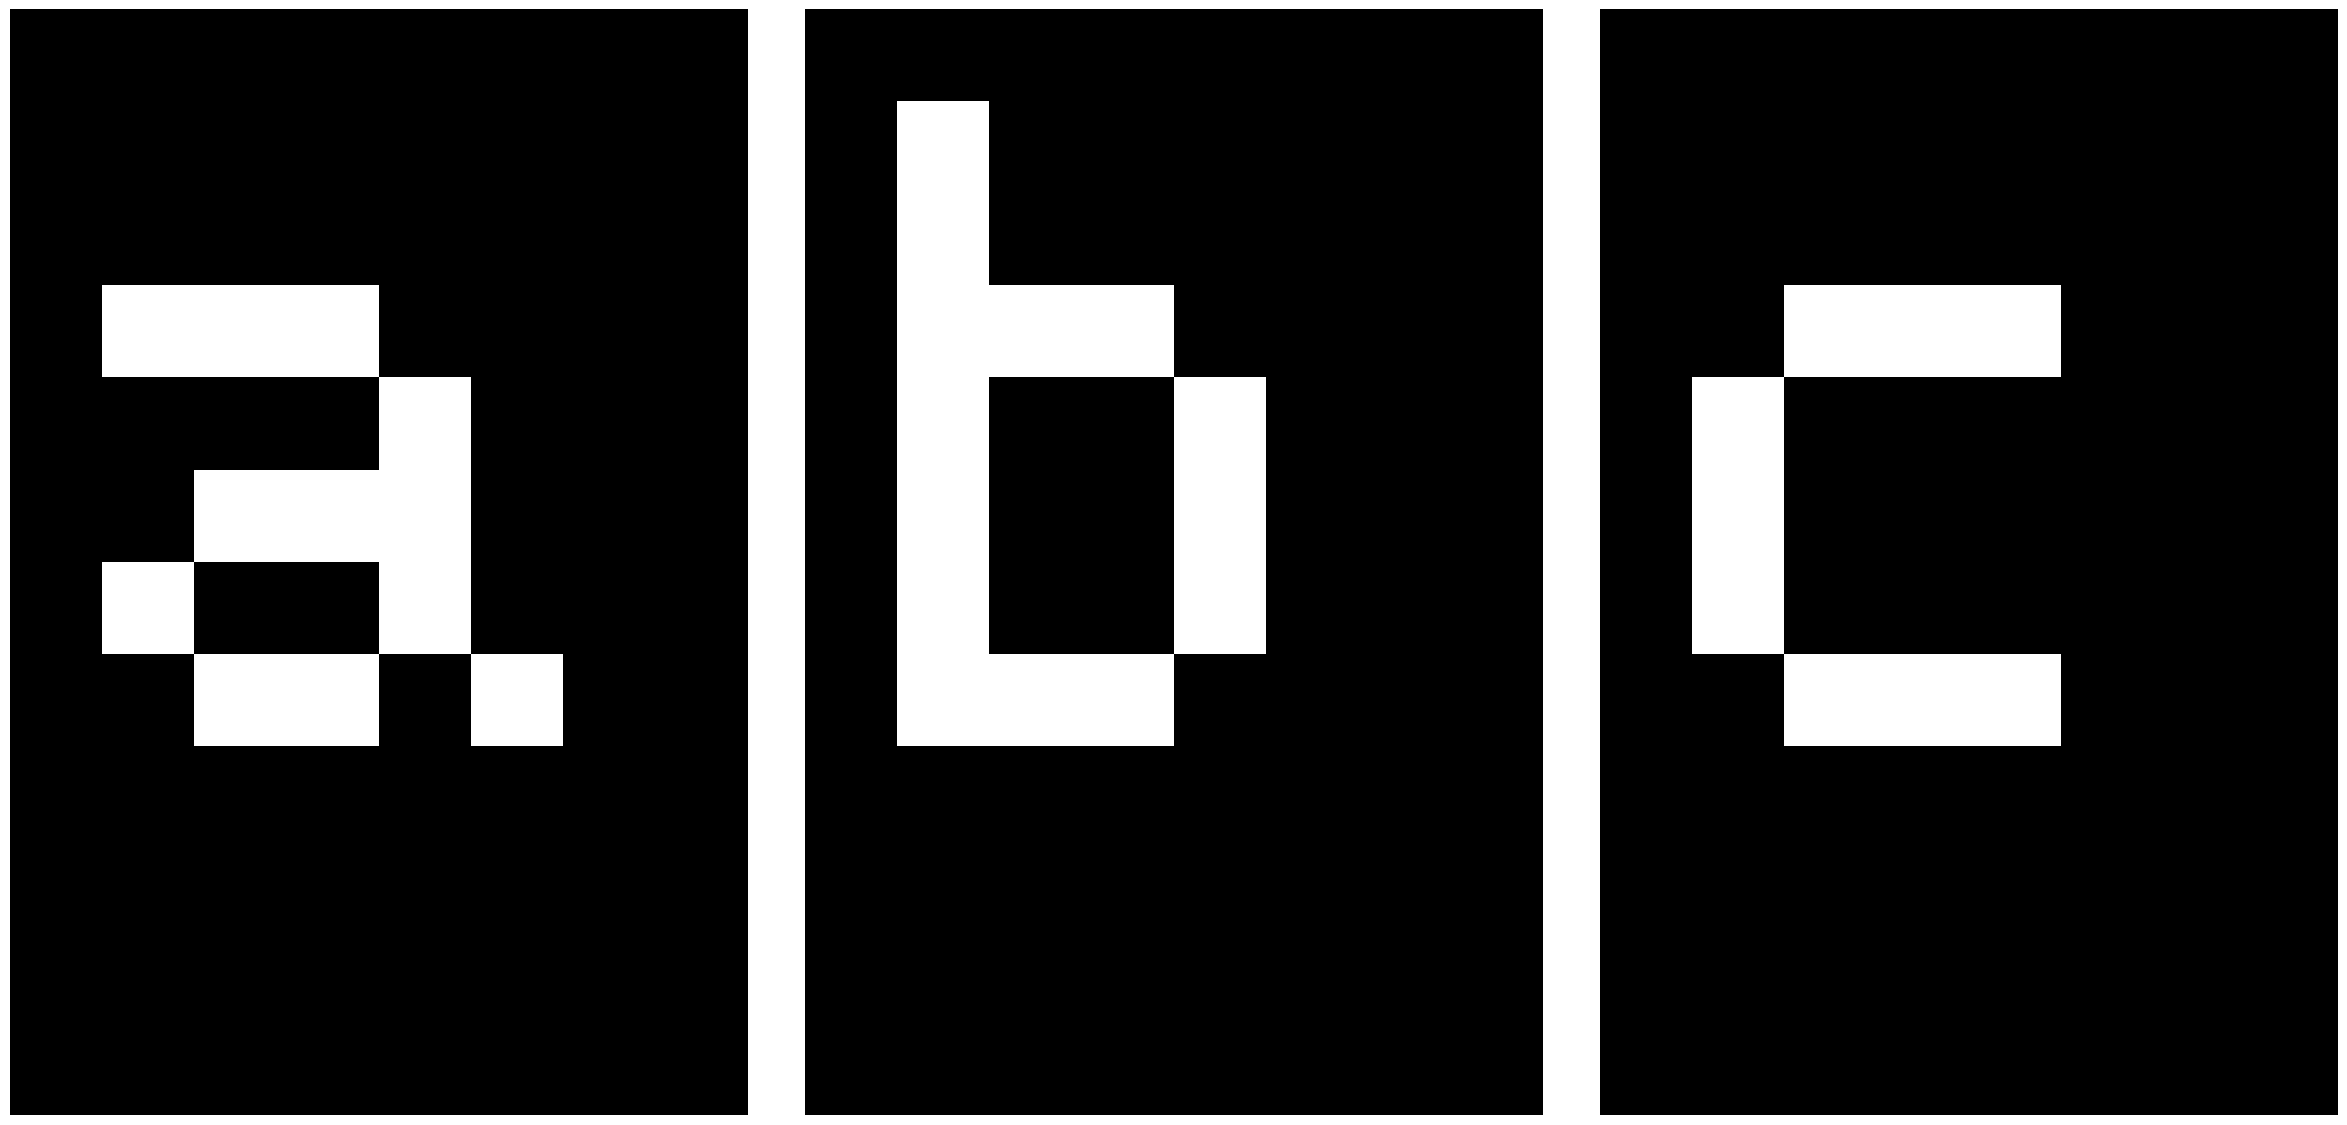

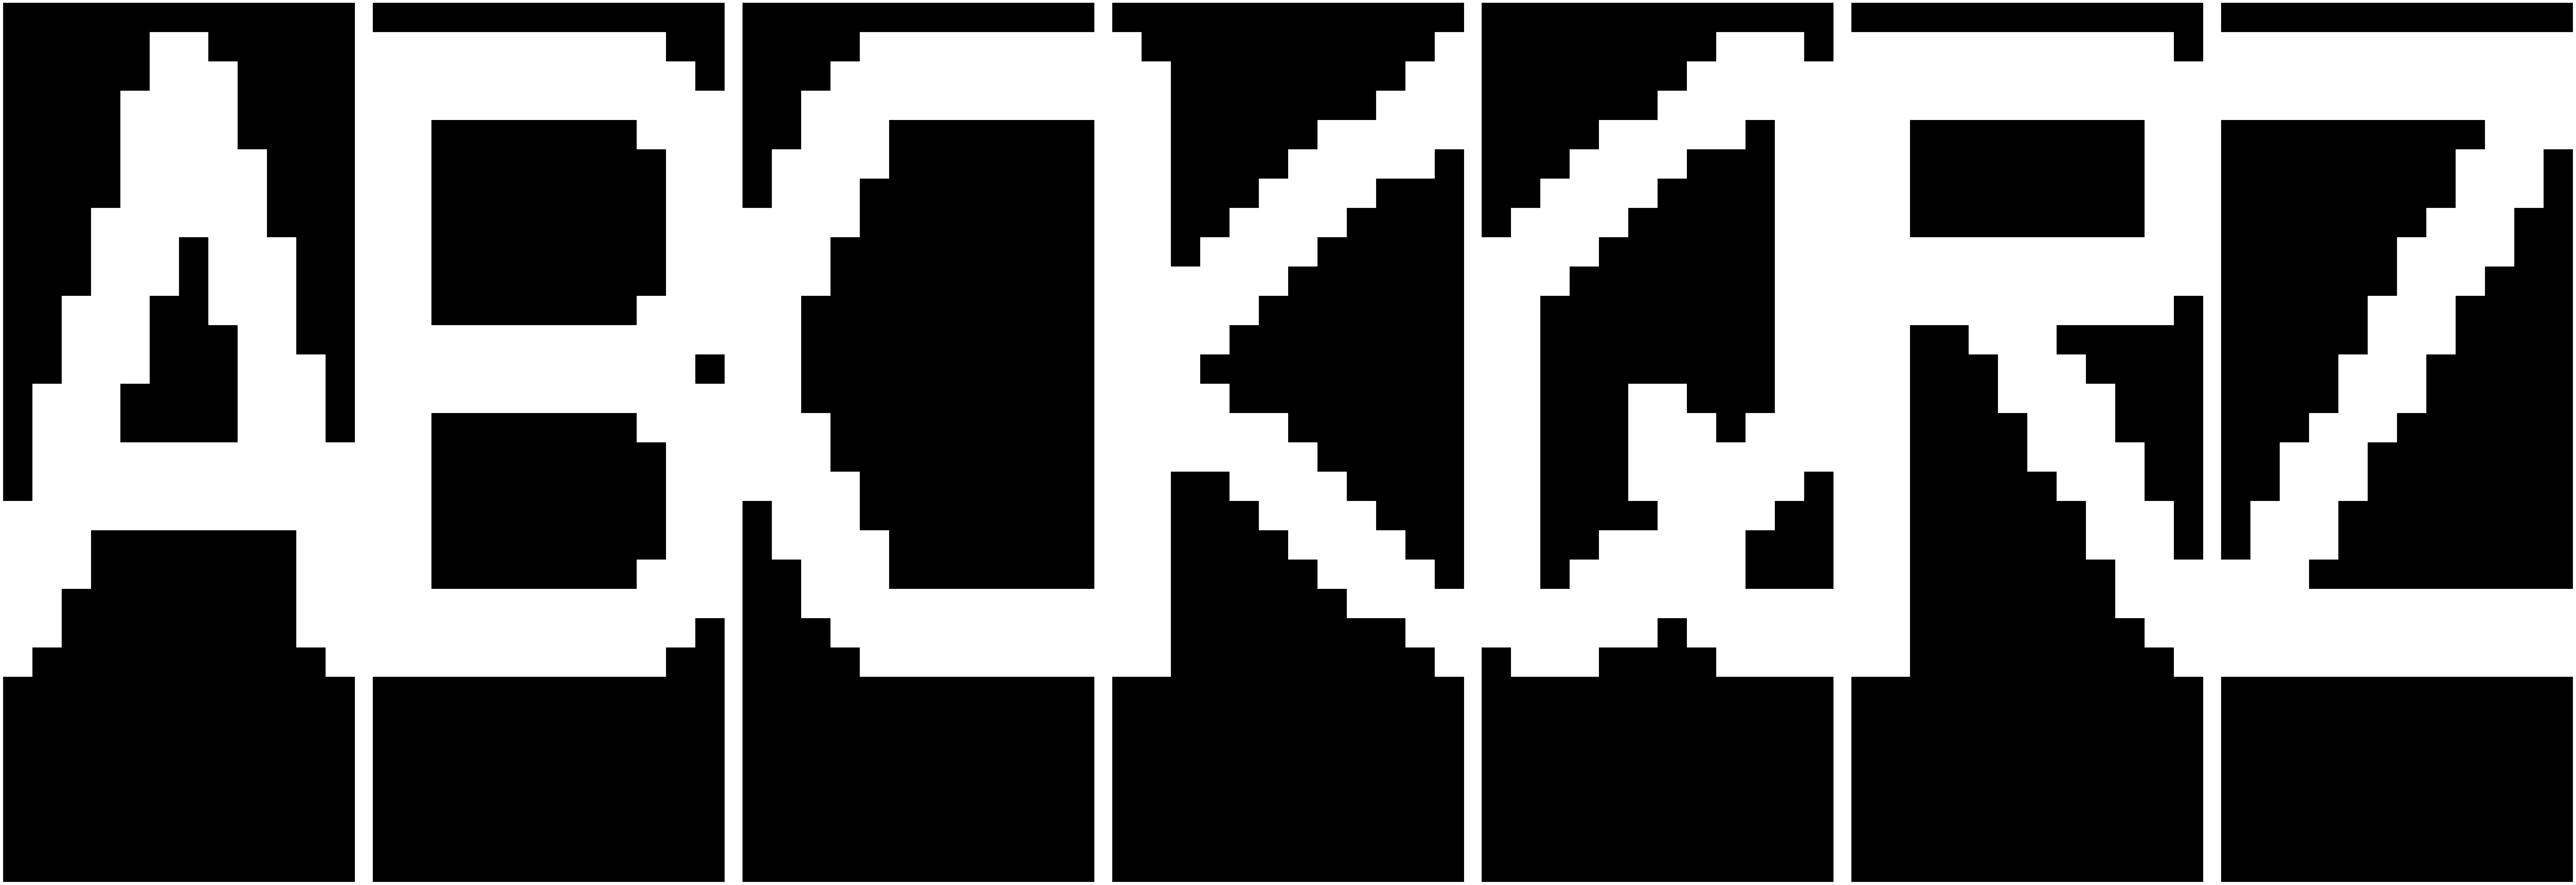

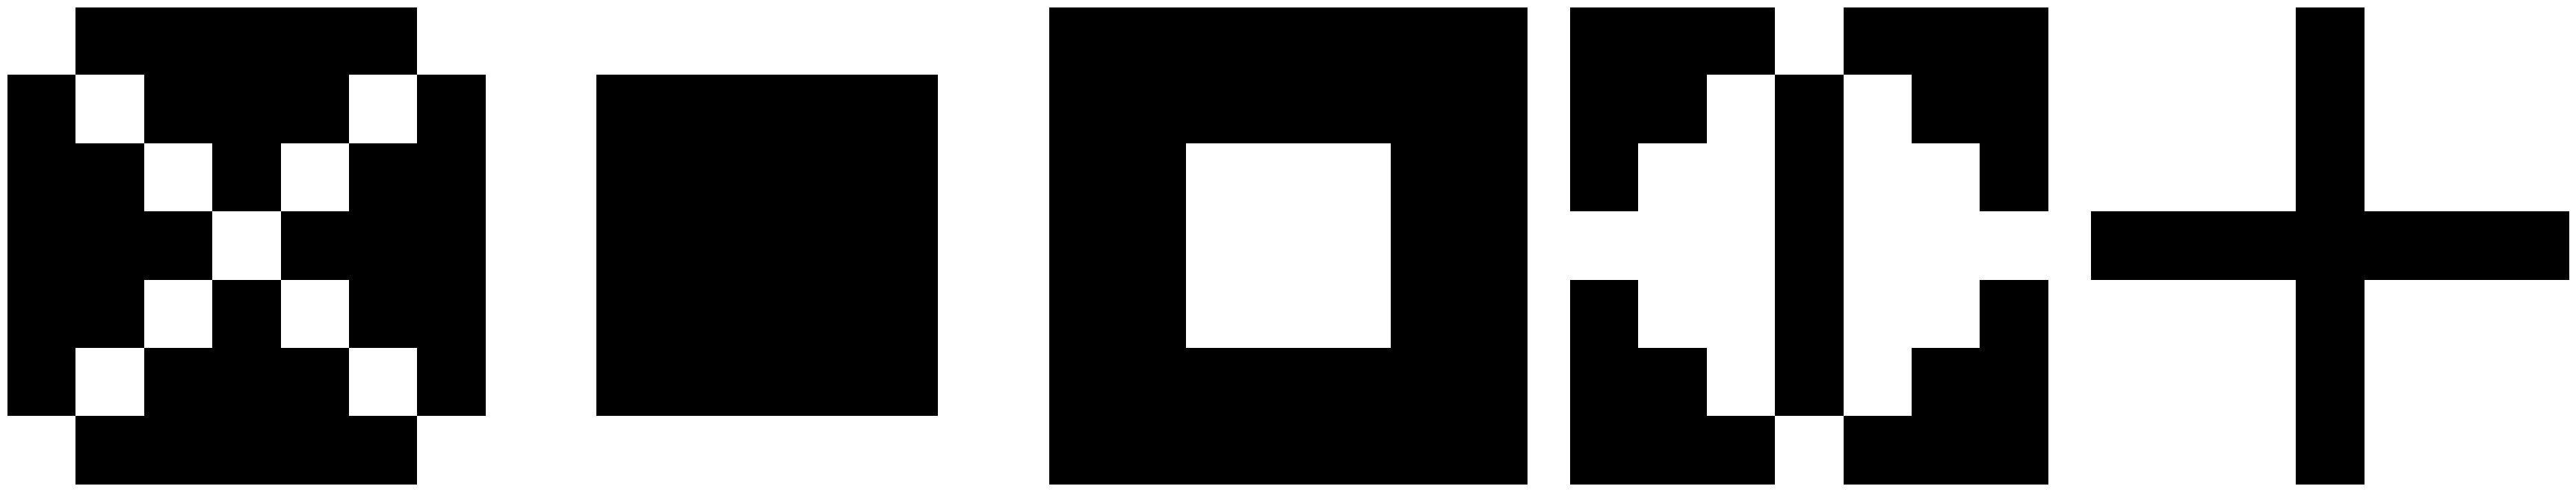

In [3]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os
import matplotlib.pyplot as plt
import numpy as np

dir = "Data"

test_cases = []
for _, _, files in os.walk(dir):
    for file in files:
        test_cases.append(TestCase(file, dir))

for test_case in test_cases:
    patterns_number = len(test_case.patterns)
    fig, axs = plt.subplots(1, patterns_number, figsize=(patterns_number*test_case.shape[1],test_case.shape[0]))
    fig.tight_layout()

    print(test_case.name)
    for index, pattern in enumerate(test_case.patterns):
        pattern_array = np.array(pattern)
        pattern_array = pattern_array[:test_case.shape[0] * test_case.shape[1]].reshape(test_case.shape)
        bitmap = np.where(pattern_array == 1, 255, 0)
        axs[index].axis("off")
        axs[index].imshow(bitmap, cmap='gray', interpolation='nearest')
    print()

## Koty (zdjęcia 200x300 pikseli)

In [ ]:
from PIL import Image

def konwertuj_na_czarno_bialy_i_przeskaluj(sciezka_do_zdjecia, rozmiar=(200, 300)):
    # Otwórz obraz przy użyciu Pillow
    obraz = Image.open(sciezka_do_zdjecia)

    # Przeskaluj obraz do żądanych wymiarów
    obraz = obraz.resize(rozmiar)

    # Konwertuj obraz na czarno-biały
    obraz = obraz.convert("L")

    # Zapisz zmodyfikowany obraz
    obraz.save("test1.jpg")

# Podaj ścieżkę do swojego zdjęcia
sciezka_do_zdjecia = "kot1.jpg"

# Wywołaj funkcję
konwertuj_na_czarno_bialy_i_przeskaluj(sciezka_do_zdjecia)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from hopfield import HopfieldNetwork

def konwertuj_do_wektora(sciezka_do_bitmapy, prog=128):
    # Otwórz obraz przy użyciu Pillow
    obraz = Image.open(sciezka_do_bitmapy)

    # Konwertuj obraz do skali szarości (L mode)
    obraz = obraz.convert("L")

    # Przekształć obraz do tablicy NumPy
    tablica_obrazu = np.array(obraz)

    # Stwórz wektor, przypisując -1 dla pikseli poniżej progu, a 1 dla pikseli powyżej
    wektor_obrazu = np.where(tablica_obrazu > prog, 1, -1)

    wektor_obrazu = np.reshape(wektor_obrazu, (200*300,))

    return wektor_obrazu

sciezki_do_bitmapy = ["test1.jpg","test2.jpg","test3.jpg","test4.jpg","test5.jpg"]

wektory_obrazu = []
retrived_hebbian_patterns = []
retrived_hebbian_async_patterns = []
retrived_oja_patterns = []
retrived_oja_async_patterns = []

for sciezka_do_bitmapy in sciezki_do_bitmapy:
    wektor_obrazu = konwertuj_do_wektora(sciezka_do_bitmapy)
    wektory_obrazu.append(wektor_obrazu)

#network_oja = HopfieldNetwork(200*300)
#network_oja.train_oja(patterns=wektory_obrazu)

network_hebbian = HopfieldNetwork(200*300)
network_hebbian.train_hebbian(patterns=wektory_obrazu)

for index,pattern in enumerate(wektory_obrazu):
    retrived_pattern = network_hebbian.recall(pattern=pattern)
    print(f"Hebbian_{index}:"+str((retrived_pattern == pattern).sum()/float(retrived_pattern.size)))
    retrived_hebbian_patterns.append(retrived_pattern)

    retrived_pattern = network_hebbian.recall_async(pattern=pattern)
    print(f"Hebbian_async_{index}:"+str((retrived_pattern == pattern).sum()/float(retrived_pattern.size)))
    retrived_hebbian_async_patterns.append(retrived_pattern)

    #retrived_pattern = network_oja.recall(pattern=pattern)
    #print(f"Oja_{index}:"+str((retrived_pattern == pattern).sum()/float(retrived_pattern.size)))
    #retrived_oja_patterns.append(retrived_pattern)

    #retrived_pattern = network_oja.recall_async(pattern=pattern)
    #print(f"Oja_async_{index}:"+str((retrived_pattern == pattern).sum()/float(retrived_pattern.size)))
    #retrived_oja_async_patterns.append(retrived_pattern)

# Wydrukuj wynik
def wektor_do_bitmapy(wektor, szerokosc, wysokosc):
    # Przekształć wektor na dwuwymiarową tablicę pikseli
    tablica_pikseli = np.reshape(wektor, (wysokosc, szerokosc))

    # Przeskaluj wartości pikseli do zakresu [0, 255]
    tablica_pikseli = ((tablica_pikseli + 1) / 2.0) * 255.0

    # Stwórz obraz z tablicy pikseli
    obraz = Image.fromarray(tablica_pikseli.astype(np.uint8))

    return obraz

szerokosc = 200
wysokosc = 300

for index, wektor_obrazu in enumerate(retrived_hebbian_patterns):
    
    obraz = wektor_do_bitmapy(wektor_obrazu, szerokosc, wysokosc)

    #obraz.show()

    # Zapisz obraz do pliku
    obraz.save("retrieved_hebbian_test_"+str(index)+".jpg")

for index, wektor_obrazu in enumerate(retrived_hebbian_async_patterns):
    
    obraz = wektor_do_bitmapy(wektor_obrazu, szerokosc, wysokosc)

    #obraz.show()

    # Zapisz obraz do pliku
    obraz.save("retrieved_hebbian_async_test_"+str(index)+".jpg")

#for index, wektor_obrazu in enumerate(retrived_oja_patterns):
    
    #obraz = wektor_do_bitmapy(wektor_obrazu, szerokosc, wysokosc)

    #obraz.show()

    # Zapisz obraz do pliku
    #obraz.save("retrieved_oja_test_"+str(index)+".jpg")

#for index, wektor_obrazu in enumerate(retrived_oja_async_patterns):
    #obraz = wektor_do_bitmapy(wektor_obrazu, szerokosc, wysokosc)

    #obraz.show()

    # Zapisz obraz do pliku
    #obraz.save("retrieved_oja_async_test_"+str(index)+".jpg")
